In [111]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
def get_images_from_folder(folder):
    #storing the path for all the images
    images = []
    labels = []
    for filename in os.listdir(folder):
        labels.append(filename[:3])
        img = os.path.join(folder,filename)
        if img is not None:
            images.append(img)
    return images,labels

In [74]:
folder = "C:\\Users\\Trisha Sarkar\\Downloads\\Datasets\\cat_vs_dog_svm"
images, labels = get_images_from_folder (folder)

In [75]:
#fv - feature vector
def image_to_fv(image, size):
    resized = cv2.resize(image,size)
    fv = resized.flatten()
    return fv

In [76]:
s = cv2.imread(images[0])
print(s.shape)
s1 = cv2.imread(images[48])
print(s1.shape)

(374, 500, 3)
(374, 500, 3)


In [77]:
#iterating in training set of data
fv_all = []
for i in images:
    img = cv2.imread(i)
    #stores the raw pixel values in a 1 dim array
    pixels = image_to_fv(img, (300,350))
    fv_all.append(pixels)

In [78]:
fv_all[0].shape

(315000,)

In [100]:
X_train,X_test,y_train,y_test = train_test_split(fv_all,labels,test_size = 0.3, random_state=4)
#Training: input data X_train and their labels X_test
#Testing: input data y_train and their labels y_test(y_test is not fed to the model)

In [101]:
#SVM
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

In [102]:
#KNN
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [103]:
model_dt= DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_knn.predict(X_test)

In [145]:
model_rf = RandomForestClassifier(n_estimators=43, random_state=1)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [104]:
y_test=np.array(y_test)

Accuracy of SVM:  0.5934065934065934
Accuracy of KNN:  0.5934065934065934


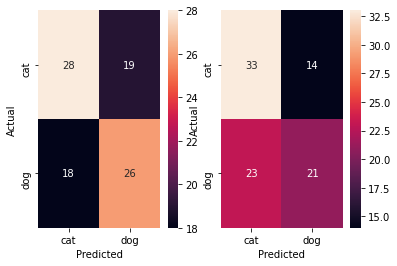

In [153]:
fig, (ax1, ax2) = plt.subplots(1,2)

confusion_matrix = pd.crosstab(y_test,y_pred_svm,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, ax=ax1)
print("Accuracy of SVM: ",accuracy_score(y_test,y_pred_svm))

confusion_matrix = pd.crosstab(y_test,y_pred_knn,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, ax=ax2)
print("Accuracy of KNN: ",accuracy_score(y_test,y_pred_knn))


Accuracy of Decision Tree:  0.5934065934065934
Accuracy of Random Forest:  0.5384615384615384


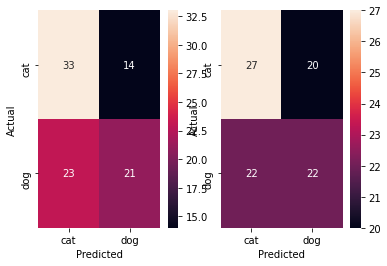

In [155]:
fig, (ax3, ax4) = plt.subplots(1,2)

confusion_matrix = pd.crosstab(y_test,y_pred_dt,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, ax=ax3)
print("Accuracy of Decision Tree: ",accuracy_score(y_test,y_pred_dt))

confusion_matrix = pd.crosstab(y_test,y_pred_rf,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, ax=ax4)
print("Accuracy of Random Forest: ",accuracy_score(y_test,y_pred_rf))

In [84]:
model.support_vectors_

array([[ 25.,  58.,  84., ...,   2.,   1.,  18.],
       [153., 170., 192., ..., 109., 133., 155.],
       [109., 138., 169., ...,  34.,  45.,  65.],
       ...,
       [156., 148., 165., ..., 221., 195., 201.],
       [ 99.,  96.,  88., ..., 130., 131., 129.],
       [ 22.,  81.,  50., ...,  70., 156., 114.]])

In [85]:
model.n_support_

array([102, 107])

Accuracy:  0.5934065934065934


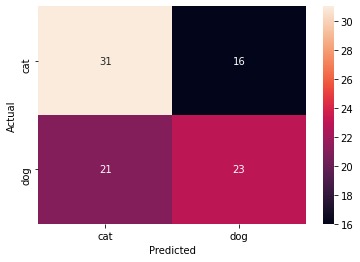

In [149]:
ens = VotingClassifier(estimators=[('dt', model_dt), ('knn', model_knn), ('svc', model_svm)])

ens.fit(X_train,y_train)
y_pred = ens.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print("Accuracy: ",accuracy_score(y_test,y_pred))